In [1]:
# Let's code it up, preamble first. 

import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 

# STA 2453 Lab 1 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are _ questions, you must add both this notebook, and another generated .py file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-1.ipynb`
- `STA2453-Lab-1.py`

Both of these are needed for a good submission. 



# Case Study: Does God Hate Rich People? 


## Introduction 

Extreme weather events in the U.S. are regularly tracked by the National Oceanic and Atomspheric Administration (NOAA).

The NCDC Storm Events database is provided by the National Weather Service (NWS) and contain statistics on personal injuries and damage estimates. (ref. gov.noaa.ncdc:C00510). 

## The question is, are high-income or low-income households more susceptible to extreme weather events? 

The US Household Income dataset provided by Golden Oak Research Group contains 32,000 records on US Household Income Statistics & Geo Locations. The dataset originally developed for real estate and business investment research. Income is a vital element when determining both quality and socioeconomic features of a given geographic location. (ref. Golden Oak Research Group, LLC. “U.S. Income Database Kaggle”. Publication: 5, August 2017.)


The two files listed here: 

## Storm Weather Event Data
`https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv`


## Golden Oak Research Group Data
`https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv`

In [2]:
# Load data

!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv
!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv


--2022-09-27 11:22:51--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3967894 (3.8M) [text/plain]
Saving to: ‘StormEvents_locations-ftp_v1.0_d2014_c20180718.csv.4’

StormEvents_locatio 100%[===================>]   3.78M  4.97MB/s    in 0.8s    

2022-09-27 11:22:52 (4.97 MB/s) - ‘StormEvents_locations-ftp_v1.0_d2014_c20180718.csv.4’ saved [3967894/3967894]

--2022-09-27 11:22:52--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent

In [3]:
income_df = pd.read_csv("kaggle_income_clean.csv")
storm_df = pd.read_csv("StormEvents_locations-ftp_v1.0_d2014_c20180718.csv")


## Cleaning Data 

We want to take only the continental US data, so that involves the following: 

- `20 < Lat < 50`
- `Lon > -140`


Furthermore we want to create two dataframes, one for poor people, one for rich people. According to the US Census Bureau, a person who's average income is below \$25k is considered below the poverty line, while a person exceeding \$100k is considered wealthy. 

Create two dataframes called `rich_df` and `poor_df` for analysis after cleaning out for strictly continental US. 


In [4]:
# clean df. 
income_df = income_df[(income_df["Lat"] < 50) & (income_df["Lat"] > 20) & (income_df["Lon"] > -140)]
storm_df = storm_df[(storm_df["LATITUDE"] < 50) & (storm_df["LATITUDE"] > 20) & (storm_df["LONGITUDE"] > -140)]

In [5]:
# rich/poor segmentation
poor_df = income_df[income_df.Mean < 25000]
rich_df = income_df[income_df.Mean > 100000]

## Calculate Nearest Distance between Points

For each household we need to calculate the nearest severe weather event. We should write a function to do this. Let $x$,$y$ denote longitude and latitude respectively. then for some Houshold $H$, we should calculate the distance to all the severe weather events $E$ longitude and latitude. 


$$ d_{H,E} = 110.574 \times \sqrt{(x_H - x_E)^2 + (y_H - y_E)^2} $$

Basically we are getting a eucledian distance to each severe weather event, and then multiplying by a constant to convert to km's for sanity. Then we want to find the distance to the nearest event so we take the minimum... 

$$ d_{min} = \text{argmin}\{d_{H,E_1}, d_{H,E_2}, \dots, d_{H,E_n} \} $$ 


Do this for every household, and plot the results in a histogram for both rich/poor households.  

In [6]:
# calculate the nearest points.

def nearest_point(income_df, storm_df):
    n = income_df.shape[0]
    i = 0
    ans = np.zeros(n, dtype = "float")
    
    for index, row in income_df.iterrows():
        x_h = row['Lon']
        y_h = row['Lat']
        x_e = storm_df['LONGITUDE'].to_numpy()
        y_e = storm_df['LATITUDE'].to_numpy()
        
        dist = 110.574 * ((x_h-x_e)**2+(y_h-y_e)**2)**0.5
        dist = np.min(dist)
        ans[i] = dist
        i += 1
    
    return ans
        
rich_nearest_dist = nearest_point(rich_df, storm_df)
poor_nearest_dist = nearest_point(poor_df, storm_df)
    
    
    

Text(0.5, 1.0, 'Distribution of Nearest Storm for the Rich')

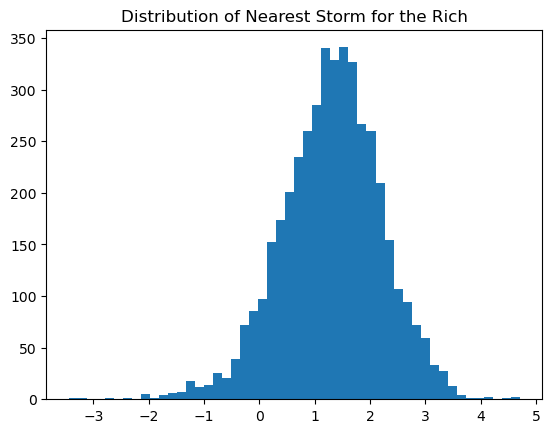

In [19]:
# plot rich people histogram, make bins at least 50, comment on the plot.
plt.hist(np.log(rich_nearest_dist), bins = 50);
plt.title(f"Distribution of Nearest Storm for the Rich")

Text(0.5, 1.0, 'Distribution of Nearest Storm for the Poor')

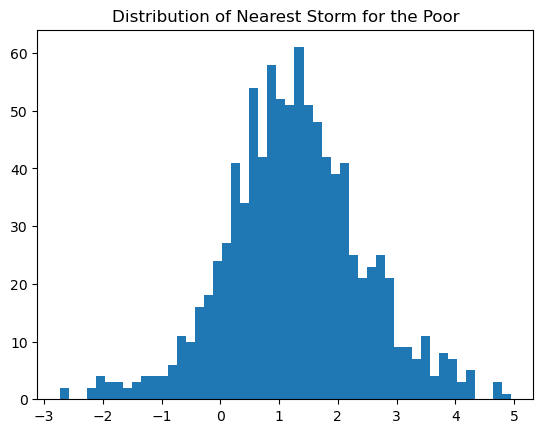

In [20]:
# plot poor people histogram, make bins at least 50, comment on the plot
plt.hist(np.log(poor_nearest_dist), bins = 50);
plt.title(f"Distribution of Nearest Storm for the Poor")

# Distributional Characteristic Statistics

In the following cells please perform some statistical analysis and determine whether rich people are more likely to be struck by extreme weather events, or, poor people are more likely. The methods/statistics presented in week one in class are extremely useful.  

You should also find the difference of mean pooled t-test useful in this case but you must justify your assumptions for using it. You can use any python libraries or functions as well as go on stack overflow. You should also use the functions written up in the previous class [here](https://colab.research.google.com/drive/1L1Kx8qoHCY3yjuYg2tE4W61xu79xG7lJ?usp=sharing).

$$ t = \frac{ \bar{X}_R - \bar{X}_P}{ s_T \sqrt{\frac{1}{n_R} + \frac{1}{n_P}}  } $$

where, 
$$ s_T = \sqrt{ \frac{(n_R - 1)s_R + (n_P -1)s_P}{n_R + n_P - 2}  }  $$

Hint: Use the following function `stats.ttest_ind` and adjust the appropriate setting such that you test wether $\bar{X}_R > \bar{X}_P$, or vice versa.

Hint-2: Use the functions from the previous week's notebook. 

Caveat: Keep resampling techniques under 500 scenarios (in class we used 1000).


### Please write your conclusion at the end wether Rich or Poor people are more likely to get hit by a severe weather storm. 

In [11]:
def display_statistics(x: np.array) -> None: 
    x_min = np.min(x)
    x_med = np.median(x)
    x_mean = np.mean(x)
    x_max = np.max(x)
    x_var = np.var(x)
    x_skew = stats.skew(x)
    x_kur = stats.kurtosis(x)
    
    display_string = f"Min: {x_min}, Median: {x_med}, Mean: {x_mean}, Max: {x_max}, Var: {x_var}, Skewness: {x_skew}, Kurtosis: {x_kur}"
    print(display_string)

In [23]:
display_statistics(np.log(rich_nearest_dist))

Min: -3.4445065440854954, Median: 1.3409308099007495, Mean: 1.3040923372138602, Max: 4.708303011220915, Var: 0.8168008117127656, Skewness: -0.3299063436879786, Kurtosis: 0.737158857853248


In [22]:
display_statistics(np.log(poor_nearest_dist))

Min: -2.7297474985703705, Median: 1.257083352125527, Mean: 1.2674264375386723, Max: 4.944577761022621, Var: 1.3709801958822911, Skewness: -0.0037538486646179624, Kurtosis: 0.5535546533385296


We then consider applying the mean pooled t-test to teset the independence for the means of two possibly independent variables. To apply the T-test, we also need to check the following assumptions:
1. The scale of two measures follows a continuous scale, this is true for our case.
2. The data is randomly sampled from the whole population.
3. The data roughly follows the normal distribution.
4. The sample data size is reasonalbly large, this is true for our case.
5. The two datasets have the same variance. From our displayed statistics above, we can assume this to be true. 

In [24]:
t_test = stats.ttest_ind(np.log(rich_nearest_dist), np.log(poor_nearest_dist))


In [25]:
print(t_test[0])
print(t_test[1])

1.0653065939602715
0.2867857472504475


Thus, we conclude that God does not hate rich people, there is not evidience showing that storm location is relatied to the locations of rich/poor people